In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [ ]:
training_dataroot = 'train-data-10-year.csv'
testing_dataroot = 'test-data-10-year.csv'

Training_dataset = pd.read_csv(training_dataroot)
Testing_dataset = pd.read_csv(testing_dataroot)

In [ ]:
def Split_Label(Training_dataset, Testing_dataset):
  X_train, y_train = Training_dataset.drop(['price'], axis=1), Training_dataset['price']
  X_test, y_test = Testing_dataset.drop(['price'], axis=1), Testing_dataset['price']
  #print(X_train)
  return X_train, y_train, X_test, y_test

def Train_Model(X_train, y_train, num_folds):
  model = LinearRegression()
  kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
  r2_scores = []

  for train_index, val_index in kf.split(X_train):
      X_kf_train, X_kf_val = X_train.iloc[train_index], X_train.iloc[val_index]
      y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]

      model.fit(X_kf_train, y_kf_train)
      y_pred = model.predict(X_kf_val)
      r2 = r2_score(y_kf_val, y_pred)
      r2_scores.append(r2)

  mean_r2 = np.mean(r2_scores)
  print(f"Average R² score: {mean_r2}")

  plt.figure(figsize=(5, 3))
  plt.plot(range(1, num_folds + 1), r2_scores, marker='o', linestyle='-', color='b')
  plt.title(f'R² Scores for {num_folds}-fold Cross-Validation')
  plt.xlabel('Fold')
  plt.ylabel('R² Score')
  plt.xticks(np.arange(1, num_folds + 1))
  plt.grid(True)
  plt.show()

  return model

def Predict(model, X_test, y_test):
  y_pred_test = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  print(f"R² Score on the test set: {r2_test}")
  print(f"MSE on the test set: {mse_test}")

Average R² score: 0.6939591667569479


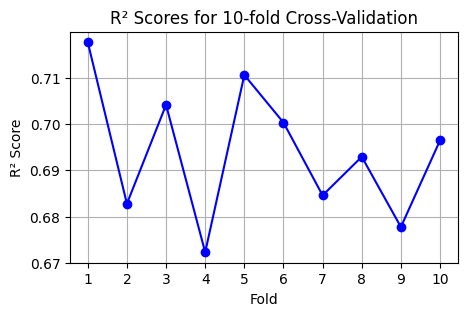

R² Score on the test set: 0.6964557761636457
MSE on the test set: 8687641232098.038


In [ ]:
if __name__ == '__main__':
  X_train, y_train, X_test, y_test = Split_Label(Training_dataset, Testing_dataset)

  num_folds = 10
  model = Train_Model(X_train, y_train, num_folds)

  Predict(model, X_test, y_test)

In [ ]:
def Train_Model(X_train, y_train, num_folds, batch_size=128, num_epochs=100):
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(2048, activation='relu', input_dim=X_train.shape[1]),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(1)  # Output layer
  ])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse'])

  kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
  r2_scores = []

  for train_index, val_index in kf.split(X_train):
    X_kf_train, X_kf_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]

    history = model.fit(X_kf_train, y_kf_train, epochs=num_epochs, batch_size=batch_size, verbose=0, validation_data=(X_kf_val, y_kf_val))

    y_pred = model.predict(X_kf_val)
    r2_val = r2_score(y_kf_val, y_pred)
    r2_scores.append(r2_val)

    mse = mean_squared_error(y_kf_val, y_pred)

    print(f"R² Score on the validation set: {r2_val}")
    print(f"MSE Score on the validation set: {mse}")

    plt.figure(figsize=(5, 3))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

  mean_r2 = np.mean(r2_scores)
  print(f"Average R² score: {mean_r2}")

  return model

def Predict(model, X_test, y_test):
  y_pred_test = model.predict(X_test)
  r2_test = r2_score(y_test, y_pred_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  print(f"R² Score on the test set: {r2_test}")
  print(f"MSE on the test set: {mse_test}")

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Physical GPUs:", len(physical_devices))

Physical GPUs: 1


340/340 [==============================] - 1s 2ms/step
R² Score on the validation set: 0.7794857016852871
MSE Score on the validation set: 6296824238611.329


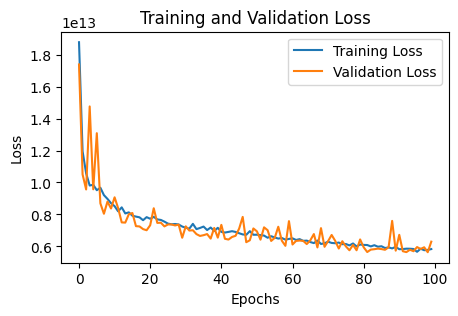

340/340 [==============================] - 1s 2ms/step
R² Score on the validation set: 0.8274168643478929
MSE Score on the validation set: 5038167488775.072


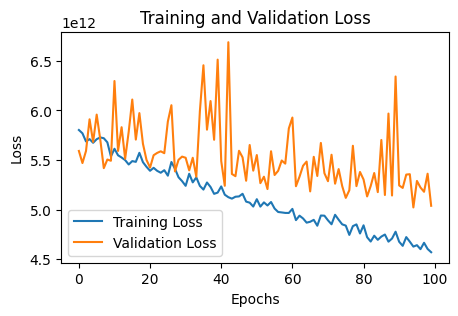

340/340 [==============================] - 1s 2ms/step
R² Score on the validation set: 0.8372573564620109
MSE Score on the validation set: 4692891886763.281


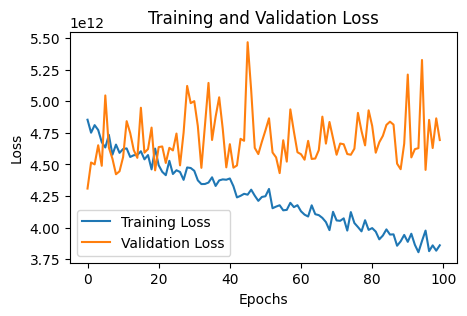

340/340 [==============================] - 1s 2ms/step
R² Score on the validation set: 0.8491854257092553
MSE Score on the validation set: 4359708782231.056


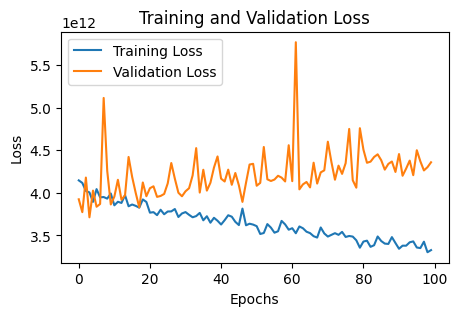

340/340 [==============================] - 1s 2ms/step
R² Score on the validation set: 0.8614155194817203
MSE Score on the validation set: 4084931023974.9126


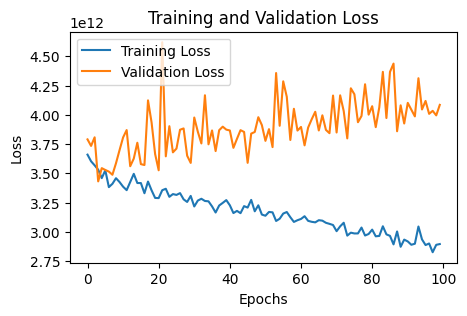

Average R² score: 0.8309521735372332
189/189 [==============================] - 0s 2ms/step
R² Score on the test set: 0.8219622725410514
MSE on the test set: 5095560318667.973


In [ ]:
if __name__ == '__main__':
  X_train, y_train, X_test, y_test = Split_Label(Training_dataset, Testing_dataset)

  num_folds = 5
  model = Train_Model(X_train, y_train, num_folds)

  Predict(model, X_test, y_test)